# Modelos categóricos

Muchas veces tienen variables categóricas o cualitativas. Asumimos que pueden ser continuas u obtener cualquier valor, asumir valores numéricos como por ejemplo en el caso de género. El problema está que muchas veces nos puede dar un resultado equívoco, el modelo tiene que servir. 

En este caso vamos a tener la categórica, 1 si el cliente es hombre y 0 si el cliente es mujer, entonces voy a tener dos modelos para el modelo y. 

# Tratamiento variables categóricas

In [5]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [6]:
df=pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [7]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [8]:
dummy_gender =pd.get_dummies(df["Gender"], prefix= "Gender")
dummy_city_tier= pd.get_dummies(df["City Tier"], prefix= "City")

In [9]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [10]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [11]:
column_names=df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [12]:
df_new =df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [13]:
df_new =df_new[column_names].join(dummy_city_tier)
df_new.head()


,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [14]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [15]:
X= df_new[feature_cols]
Y = df_new["Total Spend"]


In [16]:
lm =LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(lm.intercept_)
print(lm.coef_)

51.6078829541766
[ 1.47538980e-01  1.54946125e-01 -2.62050027e+02  7.67643260e+01
  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [18]:
list(zip(feature_cols, lm.coef_))
#lista de tuplas 
#cada una de las variables y los coeficientes 

[('Monthly Income', 0.1475389804920574),
 ('Transaction Time', 0.15494612549589554),
 ('Gender_Female', -262.05002651109356),
 ('City_Tier 1', 76.76432601049511),
 ('City_Tier 2', 55.13897430923251),
 ('City_Tier 3', -131.90330031972772),
 ('Record', 772.2334457445642)]

In [19]:
lm.score(X,Y)
#valor de R cuadrado es bajo, no hemos utilizado todas las variables 
#para refinarlo toca adicionar todas las variables

0.9179923586131016

Adicionando edad el modelo no se vuelve mejor, entonces no lo tomo. 
* El modelo puede ser escrito como: 
* Total_Spend = 51.6078829541766+ 0.1475389804920574'Monthly Income'+ 0.15494612549589554'Transaction Time'+-262.05002651109356'Gender_Female'+76.76432601049511'City_Tier 1'+55.13897430923251'City_Tier 2'+-131.90330031972772'City_Tier 3'+772.2334457445642'Record'
El modelo tiene diferentes coeficientes para cada una de las variables dummies, hay un pequeño factor. El modelo global es el de Tota_Spend resumido en una sola ecuación. Si uno lo toma así, parece ser que todo el modelo es común a cada una de las categorías. La forma idónea es dividir el modelo en 6 trozos correspondientes al producto del género (hombre, mujer) y ciudades (ciudad 1, ciudad 2, ciudad 3). Si es hombre y vive en CT1: en el modelo no aparecen todas, gender male es 1 y el valor female es 0, si city tier es 1 pues este valor es 1 y los otros valores se van. El modelo se simplifica. 

In [20]:
df_new["prediction"]=51.6078829541766+0.1475389804920574*df_new["Monthly Income"]+0.15494612549589554*df_new["Transaction Time"]+ -262.05002651109356 * df_new["Gender_Female"]+76.76432601049511*df_new["City_Tier 1"]+55.13897430923251*df_new["City_Tier 2"]+ -131.90330031972772*df_new["City_Tier 3"]+772.2334457445642*df_new["Record"]

In [21]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [22]:
SSD = np.sum((df_new["prediction"]-df_new["Total Spend"])**2)
SSD

1517733985.3408165

In [23]:
RSE =np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

802.9612741012976

In [24]:
sales_mean =np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [25]:
error =RSE/sales_mean
error 
# en el rango de -15, el modelo es bastante preciso. 

0.1302836751548751

In [26]:
error*100

13.02836751548751

In [27]:
#Otra forma más simple de calcular las predicciones:


df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

# Eliminar variables dummy redundantes 

In [28]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [29]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [30]:
column_names=df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [31]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X= df_new[feature_cols]
Y=df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(lm.intercept_)

-133.67781754642056


In [33]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589631),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126296),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445635)]

El modelo sigue siendo el mismo, el R2 sigue siendo el mismo del pasado. En este caso, la información se encuentra aglutinada, la ausencia de las variables dummies nos da un modelo simplificado. Los coeficientes difieren de modo que la única forma en la que hay que interpretar: 
* El coeficiente de Gender_Male, se lleva el hombre que vive en City Tier 1. 
* El City Tier 2, sería la mujer que vive en City Tier 2 
* El City Tier 3, sería la mujer que vive en City Tier 3. 

In [34]:
lm.score(X,Y)

0.9179923586131016

Primer modelo, coeficientes con todas las variables del modelo. 
* [('Monthly Income', 0.1475389804920574),
* ('Transaction Time', 0.15494612549589554),
* ('Gender_Female', -262.05002651109356),
* ('City_Tier 1', 76.76432601049511),
* ('City_Tier 2', 55.13897430923251),
* ('City_Tier 3', -131.90330031972772),
* ('Record', 772.2334457445642)]
 
 Segundo modelo, coeficientes tras enmascarar las variables dummy pertinentes. 
* [('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en: 
* Gender_Male antes -> 131.02, después 262,05 = el de hombre - el de la mujer -> termina siendo 262
* Gender_Female -> -131.03 -(-131.03) = 0 (no quiero que aparezca en el modelo) 
* CT1 -> no aparece en el modelo. 
* CT2 -> después cambia el valor.
* CT3 -> después cambia el valor. 

# Transformación de variables para conseguir una relación no lineal 

Pueden haber relaciones no lineales como exponenciales, logarítmicas, polinómicas, etc. Lo mejor es hacer un scatterplot de la variable de salida con la matriz de scatterplot o correlación. Los puntos más o menos se distribuyen como unas variables. Si el scatter plot nos da una característica que no es lineal se pueden transformar las variables. 


In [35]:
import pandas as pd

In [36]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")

In [37]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [38]:
data_auto.shape #406 filas y 9 características

(406, 9)

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline 

Text(0.5, 1.0, 'CV vs MPG')

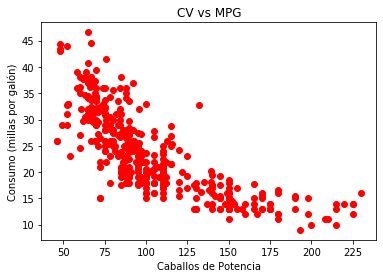

In [40]:
#vamos a eliminar Nas 
data_auto["mpg"]= data_auto["mpg"].dropna()
data_auto["horsepower"]=data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galón)")
plt.title("CV vs MPG")

Tiene una tendencia exponencial o una parábola, intentémosla volver lineal. Si no se puede, ahí sí se opta por un modelo exponencial o parabólico. 

## Modelo de regresión lineal 
* mpg = a + b*horsepower 

In [41]:
#hay que quitar Nas 
X= data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y= data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
type(X)

pandas.core.series.Series

In [43]:
type(X_data)

numpy.ndarray

El modelo lineal no me gustó, así que voy a generar un modelo polinómico con diferentes grados para ver si se ajusta mejor. También generar variables aleatorias para ver si se ajusta mejor. 

Text(0.5, 1.0, 'Ajuste lineal de los datos')

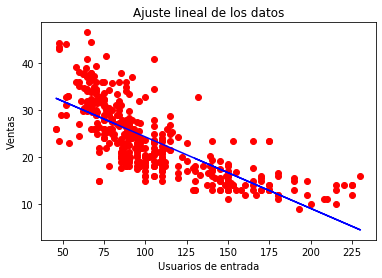

In [44]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")
plt.xlabel("Usuarios de entrada")
plt.ylabel("Ventas")
plt.title("Ajuste lineal de los datos")


In [45]:
lm.score(X_data, Y)
#el R2 es el siguiente

0.574653340645025

In [46]:
#desviación típica de los residuos 
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/len(X_data)-1)
y_mean =np.mean(Y)
error =RSE/y_mean 
SSD, RSE, y_mean, error*100

(10315.75196006092, 4.940471238582748, 23.51457286432162, 21.010252948625173)

In [47]:
#Hay un error del 21 % se puede aceptar pero se puede mejorar. 


### Modelo de regresión cuadrático 
* mpg = a + b * horsepower^2 

In [48]:
X_data= X**2 
X_data = X_data[:, np.newaxis]


In [49]:
lm =LinearRegression()
lm.fit(X_data, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lm.score(X_data, Y)

0.4849887034823205

In [51]:
#desviación típica de los residuos 
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/len(X_data)-1)
y_mean =np.mean(Y)
error =RSE/y_mean 
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.455676832957554, 23.51457286432162, 23.20125848951901)

In [52]:
#El error se incrementa al 23.2 % (esto quiere decir que el modelo no explica el 23.2%)

Esta no funcionó, entonces se utiliza un modelo lineal y cuadrático. 

# Modelo de regresión lineal y cuadrático 
* mpg = a + b horsepower + c horsepower^2 

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model 

In [54]:
poly = PolynomialFeatures(degree=2)

In [55]:
X_data = poly.fit_transform(X[:, np.newaxis])


In [56]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lm.score(X_data, Y)
#El R2 tenemos un 0.64 ya tenemos un mejor modelo. 

0.6439066584257469

In [58]:
lm.intercept_

55.026192447080355

In [59]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026192447080355 - -0.43404318 hp + 0.00112615 hp^2 

In [80]:
for d in range(2,6): 
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado " + str(d))
    print(lm.score(X_data, Y))
    print(lm.coef_)
    print(lm.intercept_)
    print("Los resultados son")
    regresion_validation(X_data, Y, lm.predict(X_data))
#estamos complicando el modelo y no disminuye el error
#se pueden ver más grados 

Regresión de grado 2
0.6439066584257469
[ 0.         -0.43404318  0.00112615]
55.026192447080355
Los resultados son
SSD: 8636.180643524502 , RSE: 4.50237502829124 , Y_mean: 23.51457286432162,  error: 19.147169094968504 % 
Regresión de grado 3
0.6444678885560744
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
58.448774111918084
Los resultados son
SSD: 8622.56936742855 , RSE: 4.498650418158693 , Y_mean: 23.51457286432162,  error: 19.131329512620837 % 
Regresión de grado 4
0.6467674189704502
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
40.096643848138505
Los resultados son
SSD: 8566.799832491353 , RSE: 4.4833572463338855 , Y_mean: 23.51457286432162,  error: 19.066292516571412 % 
Regresión de grado 5
0.6547512489366876
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
-40.693812896755176
Los resultados son
SSD: 8373.171393636556 , RSE: 4.4298504332735416 , Y_mean: 23.51457286432162,  er

In [81]:
#No mejora mucho, entonces se queda con el más sencillo, cada vez tenemos coeficientes más pequeños. 

In [82]:
def regresion_validation(X_data, Y, Y_pred): 
        SSD = np.sum((Y-Y_pred)**2)
        RSE = np.sqrt(SSD/len(X_data)-1)
        y_mean =np.mean(Y)
        error =RSE/y_mean 
        print("SSD: " +str(SSD) +" , RSE: "+  str(RSE)+ " , Y_mean: " + str(y_mean) +",  error: " + str(error*100)+ " % ")
        

# El problema de los outliers 

Datos que se alejan del modelo, los outliers se pueden detectar por los gráficos, se alejan de los otros datos. Esto puede ser bueno o puede ser malo. Se pueden quitar algunos puntos. También es importante tener en cuenta el número de puntos. 

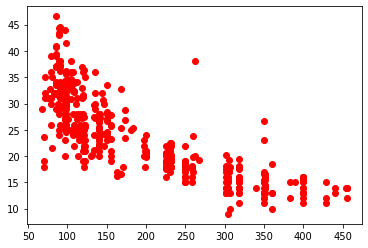

In [84]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")
#primero x luego y 

In [87]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X=X[:,np.newaxis]
Y=data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lm.score(X,Y)
#solo score porque estoy con scikit-learn 

0.6261049762826918

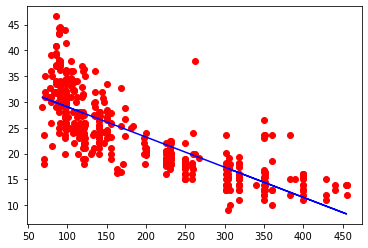

In [92]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [94]:
#filtrando datos, para quitar el dato outlier. 
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [95]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>21)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [97]:
data_auto_clean = data_auto.drop([395, 258, 305, 372 ])

In [100]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X=X[:,np.newaxis]
Y=data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)
#mejora el índice 

0.6466514317531822

# Regresión polinómica sin los outliers (falta testing) 

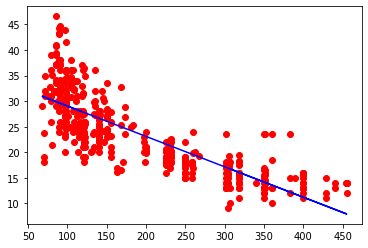

In [101]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

# Analizar los residuos 
* De forma idean la nube de puntos de los residuos debe tener. 
* Distribución simétrica o bien concentrados en el centro del gráfico. 
* Sin patrones claros en el gráfico. 
* Si se observan formas características puede ser porque: 
   * La relación entre variables no es lineal. 
   * Hay outliers en el data set. 
   * Existen puntos con valores de predicción muy elevados. 

# Resumen 
* Regresión lineal simple vs múltiple. 
* Estimación de parámetros con la técnica de los mínimos cuadrados. 
* En Python podemos usar statsmodel.api o scikit-learn. 
* A mayor R^2 mejor suele ser el modelo. 
* Hay que comprobar los p-valores, el estadístico F y RSE para validar la eficiencia del modelo. 
* Multicolinealidad. 
* Entrenamiento y testing. 
* Selección de variables a mano vs automático. 
* Variables categóricas y su conversión en dummies. 
* Transformación de variables para convertirlas en función lineal. 
